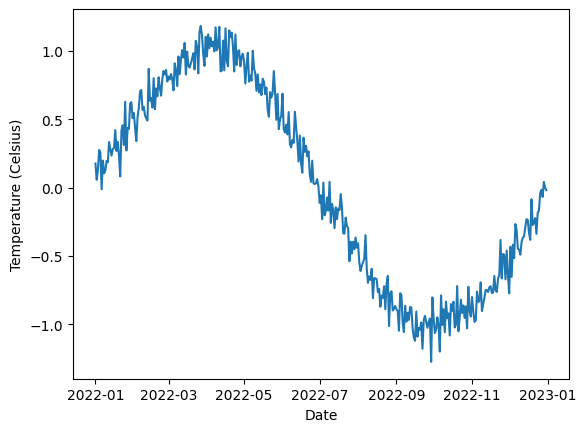

In [23]:
## prac

import numpy as np

# Generate a year's worth of daily temperature data
np.random.seed(0)
daily_temps = np.sin(np.arange(0, 2*np.pi, 2*np.pi/365)) + 0.1*np.random.randn(365)

import matplotlib.pyplot as plt

import pandas as pd

# Create a DatetimeIndex object for the year's worth of data
dates = pd.date_range(start='2022-01-01', periods=365, freq='D')

# Plot the temperature data against the dates
plt.plot(dates, daily_temps)
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()





In [24]:
print(len(daily_temps))
print(daily_temps[0])

365
0.1764052345967664


In [25]:
#data



import torch
sequence_length = 10

input_data = []
target_data = []
for i in range(len(daily_temps) - sequence_length):
    input_seq = daily_temps[i : (i+sequence_length)]
    target_seq = daily_temps[i + sequence_length]
    input_data.append(input_seq)#making 2 dim
    target_data.append(target_seq)#making 1 dim
input_data_tensor = torch.tensor(input_data,dtype = torch.float32).unsqueeze(-1)
target_data_tensor = torch.tensor(target_data,dtype = torch.float32).unsqueeze(-1)


In [26]:
len(daily_temps)

365

In [27]:
##MODEL
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, ouput_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size,hidden_size,batch_first = True)
        self.fc = nn.Linear(hidden_size,ouput_size)

    def forward(self,x):
        out,_ = self.rnn(x)
        out = self.fc(out[:,-1,:])
        return out

In [28]:
## SET
input_size  = 1
hidden_size = 32
output_size = 1
learning_rate = 0.01
num_epochs = 100

model = RNN(input_size,hidden_size,output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


In [29]:
# Save the initial model weights
best_loss = float("inf")
best_model_weights = model.state_dict()


for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(input_data_tensor)
    loss = criterion(output,target_data_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1 ) % 10 == 0:
        print(f"Epoch : {epoch + 1}, Loss :  {loss.item()}")
        
    if loss.item() < best_loss:
        best_loss = loss.item()
        best_model_weights = model.state_dict()# I didnt put break, since it could flux


##if you dont want to save in your pc
"""
best_model = RNN(input_size, hidden_size, ouput_size)
best_model.load_state_dict(best_weights)
"""

# Save the best model weights to a file
torch.save(best_model_weights, "best_model_weights.pt")

# Load the best model weights from the file
best_model_weights = torch.load("best_model_weights.pt")

# Create a new model with the same architecture
best_model = RNN(input_size, hidden_size, output_size)

# Load the best model weights into the new model
best_model.load_state_dict(best_model_weights)




Epoch : 10, Loss :  0.03813828527927399
Epoch : 20, Loss :  0.015628403052687645
Epoch : 30, Loss :  0.01616056263446808
Epoch : 40, Loss :  0.01494002528488636
Epoch : 50, Loss :  0.013953628949820995
Epoch : 60, Loss :  0.013937528245151043
Epoch : 70, Loss :  0.013694197870790958
Epoch : 80, Loss :  0.01359950564801693
Epoch : 90, Loss :  0.013481603935360909
Epoch : 100, Loss :  0.013386561535298824


<All keys matched successfully>